In [20]:
from opt_mol_pair_generator_double import SME_opt_sub_detect, sub_data_filter, sme_mol_opt
import pickle as pkl
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
import re
import random

random.seed(2046)
def canonical_smi(smiles):
    mol = Chem.MolFromSmiles(smiles, sanitize=False)
    Chem.SanitizeMol(mol)
    
    atoms_marked_zero = [atom.GetIdx() for atom in mol.GetAtoms() if atom.GetAtomMapNum() == 0]
    cleaned_smiles = re.sub(r'\:\d+\]', ']', smiles)
    return cleaned_smiles, atoms_marked_zero


def mol_visualize(smi, remove_atom_index=[]):
    mol = Chem.MolFromSmiles(Chem.MolToSmiles(Chem.MolFromSmiles(smi), doRandom=True)) # 例如，使用苯的SMILES字符串
    
    atoms_to_highlight = remove_atom_index

    bonds_to_highlight = []
    for bond in mol.GetBonds():
        if bond.GetBeginAtomIdx() in atoms_to_highlight and bond.GetEndAtomIdx() in atoms_to_highlight:
            bonds_to_highlight.append(bond.GetIdx())

    drawer = rdMolDraw2D.MolDraw2DSVG(100, 100) 
    opts = drawer.drawOptions()

    rdMolDraw2D.PrepareAndDrawMolecule(drawer, mol, highlightAtoms=atoms_to_highlight, highlightBonds=bonds_to_highlight)
    drawer.FinishDrawing()

    svg = drawer.GetDrawingText().replace('svg:', '')
    display(SVG(svg))

CC(C)C1CCC(C)CC1O


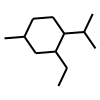

CC(C)C1CCC(C)CC1O


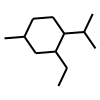

CC(C)C1CCC(C)CC1O


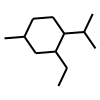

CC(C)C1CCC(C)CC1O


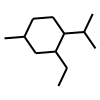

CC(C)C1CCC(C)CC1O


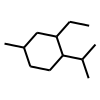

CC(C)C1CCC(C)CC1O


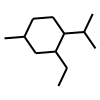

CC(C)C1CCC(C)CC1O


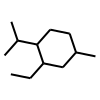

CC(C)C1CCC(C)CC1O


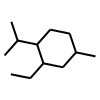

CC(C)C1CCC(C)CC1O


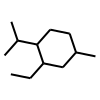

CC(C)C1CCC(C)CC1O


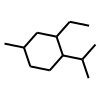

In [25]:
for i in range(10):
    random.seed(10+i)
    print(Chem.MolToSmiles(Chem.MolFromSmiles('CC(C)C1CCC(C)CC1O'), canonical=False))
    mol_visualize('CC(C)C1CCC(C)CC1CC')


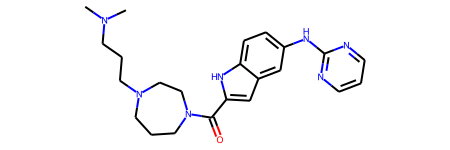

In [4]:
a = Chem.MolFromSmiles('CN(C)CCCN1CCCN(C(=O)c2cc3cc(Nc4ncccn4)ccc3[nH]2)CC1')
a